In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 그래프 설정
plt.rcParams['font.family']= 'Malgun Gothic'
# plt.rcParams['font.family']= 'AppleGothic'
plt.rcParams['font.size']  = 16
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 다른 데이터로 확인하기
LPL = pd.read_csv('projectData/LPL3_RESULT.csv', index_col=0, encoding='CP949')
LPL['version'] = LPL['version'].str.replace('버전','')
LPL['version'] = LPL['version'].str.replace(' ','')
LPL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 919
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   game_date          1880 non-null   object 
 1   version            1880 non-null   object 
 2   team1_name         1880 non-null   object 
 3   team1_score        1880 non-null   int64  
 4   team2_score        1880 non-null   int64  
 5   team2_name         1880 non-null   object 
 6   gametime           1880 non-null   object 
 7   blue_team          1880 non-null   object 
 8   blue_score         1880 non-null   int64  
 9   blue_ban           1880 non-null   object 
 10  blue_object        1880 non-null   object 
 11  blue_object_count  1128 non-null   float64
 12  blue_call_name     1880 non-null   object 
 13  blue_line          1880 non-null   object 
 14  blue_champion      1880 non-null   object 
 15  blue_kill          1880 non-null   object 
 16  blue_death         1880 n

In [4]:
a = LPL['blue_champion'].value_counts().head(8)
b = LPL['red_champion'].value_counts().head(8)

In [5]:
sns.set_palette('Pastel2')

C:\Users\LUNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LUNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


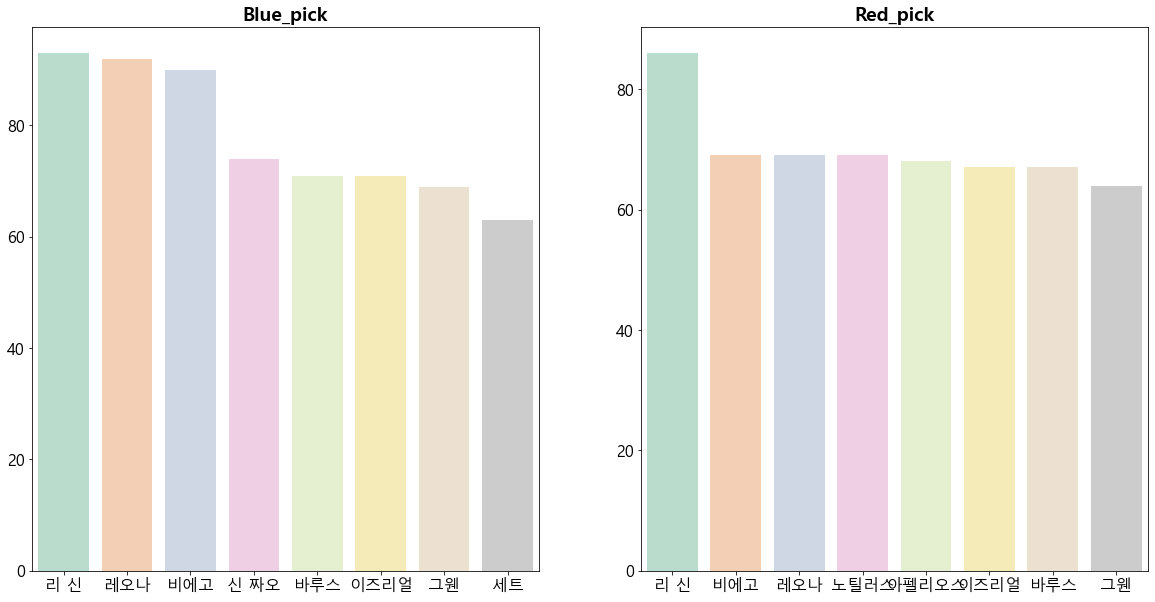

In [6]:
fig, ax1= plt.subplots(nrows=1, ncols=2, figsize=(20,10))


sns.barplot(a.index, a.values, ax=ax1[0])
ax1[0].set_title('Blue_pick', weight = 'bold')

sns.barplot(b.index, b.values, ax=ax1[1])
ax1[1].set_title('Red_pick', weight = 'bold')


plt.show()

In [7]:
# 픽 말고 밴이 가장 많이된 챔프를 확인해보자
ban_a  =LPL[['blue_ban']]
ban_a.columns=['ban']
ban_b  =LPL[['red_ban']]
ban_b.columns=['ban']
ban_all =pd.concat([ban_a,ban_b])

In [8]:
# 밴카드 상위 10개 확인
ban_all.value_counts().head(10)

ban 
레넥톤     230
신 짜오    182
르블랑     170
쓰레쉬     169
아칼리     168
녹턴      165
비에고     161
리 신     158
바루스     141
직스      120
dtype: int64

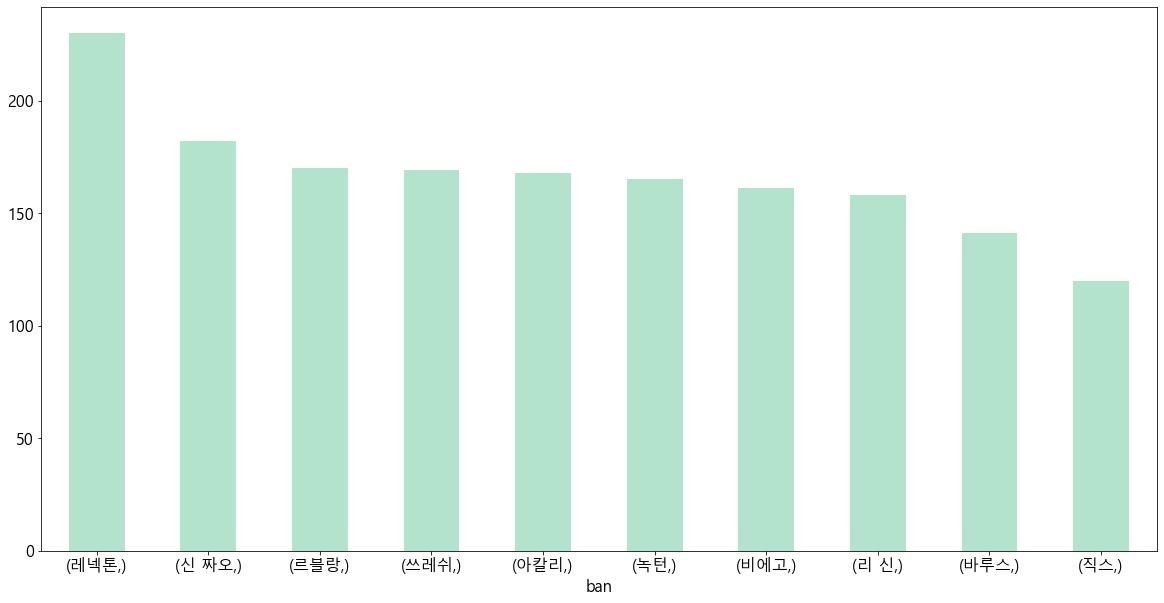

In [9]:
# 그래프 형태로 정리해서 확인
ban_all.value_counts().head(10).plot.bar(rot=0)
plt.show()

- LPL은 원딜에서 아펠이 생각보다 고평가 받는듯
- 여기서도 밴은 역시 라인전이 강한 픽들이 많이 밴 되는 모습

오브젝트를 확인해보고싶은데 데이터가 빠져있어서 확인이 불가능

In [10]:
# 오브젝트만 정리해서 확인하기
LPL_object = LPL[['blue_object','blue_object_count','red_object','red_object_count']]
LPL_object

,blue_object,blue_object_count,red_object,red_object_count
0,turret@blue,5.0,turret@red,8.0
1,inhibitor@blue,NaN,inhibitor@red,NaN
2,baron@blue,0.0,baron@red,2.0
3,dragon@blue,4.0,dragon@red,3.0
4,riftHerald@blue,NaN,riftHerald@red,NaN
...,...,...,...,...
915,turret@blue,9.0,turret@red,0.0
916,inhibitor@blue,NaN,inhibitor@red,NaN
917,baron@blue,1.0,baron@red,0.0
918,dragon@blue,3.0,dragon@red,0.0


In [11]:
# 터렛,억제기만 가져오기
LPL_turret = LPL_object[LPL_object['blue_object'] == 'turret@blue']

LPL_turret = LPL_turret.drop(columns=['blue_object','red_object'])

In [12]:
# 터렛 파괴 갯수를 경기수로 나누기

round(LPL_turret.sum()/(len(LPL)/5), 2)

blue_object_count    5.75
red_object_count     5.88
dtype: float64

In [13]:
# 전령 관련 수치 확인
LPL_riftHerald  = LPL_object[LPL_object['blue_object'] == 'riftHerald@blue']
LPL_riftHerald = LPL_riftHerald.drop(columns=['blue_object','red_object'])

In [14]:
round(LPL_riftHerald.sum()/(len(LPL)/5), 2)

blue_object_count    0.0
red_object_count     0.0
dtype: float64

- 전령이랑 억제기 관련 데이터가 없음